Doing elastic net with statsmodels package insted of sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
import os
import copy
import seaborn as sns
from sklearn.linear_model import enet_path
import matplotlib.pyplot as plt
from itertools import cycle
from random import choice
import copy
import glmnet_python
from glmnet import glmnet

In [2]:
p_MRS=np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Placebo_MRS', allow_pickle=True)
k_MRS=np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Ketamine_MRS',allow_pickle=True)

In [3]:
Y_k=np.asarray(k_MRS)

In [4]:
X_3_k= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_k.npy', allow_pickle=True)
X_3_p= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_p.npy', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_k.npy'

In [5]:
!pip install statsmodels

In [6]:

import time

Fitting a model in statsmodels typically involves 3 easy steps:

1. Use the model class to describe the model

2. Fit the model using a class method

3. Inspect the results using a summary method

In [7]:
# alphas in log space, get a training (21p) and test (6p) sets!
# you need cv for your lambda(alpha)



In [8]:
k_MRS

,difference_24h_baseline
1,-0.353290
2,0.033363
4,0.040833
5,0.156934
7,0.293444
14,0.083235
16,-0.058575
18,-0.042531
19,0.336972
20,-0.005448


In [9]:
k_MRS_arr=np.asarray(k_MRS['difference_24h_baseline'])

In [10]:
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Ketamine_MRS.npy", k_MRS_arr)

Getting test and training set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_3_k, k_MRS_arr, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(20, 180)

In [13]:
X_test.shape

(7, 180)

In [14]:
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_test.npy", y_test)
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_train.npy", y_train)
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_train.npy", X_train)
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_test.npy", X_test)

In [15]:
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)

In [17]:
X_train_df=pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.009929,-0.045856,-0.043374,0.036430,0.001377,-0.004387,-0.135917,0.020927,-0.049869,0.064684,...,-0.000212,0.029733,0.012788,0.019012,0.040149,0.037985,0.017270,-0.013260,0.005918,0.007237
1,0.162114,0.021737,-0.033868,0.116022,0.055583,-0.018851,0.097324,-0.071391,-0.053701,0.053844,...,0.068763,0.020671,-0.002089,0.062392,0.062943,-0.033910,0.039359,-0.042683,0.061967,0.021987
2,0.018938,0.048719,-0.002252,-0.008545,-0.010975,-0.023863,0.051445,-0.067685,-0.023966,-0.029605,...,-0.003277,0.055872,0.022149,-0.003708,0.009353,0.008059,-0.029056,0.020883,-0.004762,-0.010741
3,-0.004928,-0.018800,-0.029801,-0.001554,-0.008234,-0.005724,0.012491,0.012830,0.031207,0.001987,...,-0.016642,-0.017200,-0.033899,0.025774,-0.031365,0.012438,0.022819,0.014432,-0.058977,0.023294
4,-0.011440,-0.010018,0.045064,0.028678,-0.009334,-0.019518,0.025091,-0.002910,-0.043111,-0.051155,...,-0.003320,-0.060527,0.033376,-0.036586,-0.012943,0.004190,-0.054428,0.014252,-0.000269,-0.005981
5,-0.031939,-0.093170,-0.078216,0.026427,0.063610,0.011274,0.053487,-0.003522,-0.066190,0.032731,...,-0.046388,0.017461,-0.032024,0.016906,0.058440,0.005806,-0.006541,-0.000060,-0.006519,-0.006121
6,0.002864,-0.004028,-0.035239,0.033142,0.041923,0.039461,-0.020617,0.011682,0.032517,0.052715,...,0.005070,0.006438,-0.024419,0.000988,-0.009215,-0.013862,-0.000018,-0.018131,-0.039368,-0.029765
7,-0.036820,-0.009458,0.000686,-0.021184,0.010312,-0.032007,-0.013253,0.024483,-0.031312,-0.007168,...,-0.002662,-0.022157,0.009436,-0.018947,0.027748,-0.036115,0.010197,0.055232,-0.023098,-0.049610
8,-0.003538,0.009854,0.009508,0.072723,0.017363,0.068031,0.108242,0.098392,0.094275,0.002508,...,0.007623,-0.028387,-0.023404,-0.014647,-0.007742,0.013232,0.044056,0.030742,-0.011033,0.023637
9,-0.201245,-0.132473,-0.068912,0.106595,-0.087469,0.058949,-0.063684,-0.010423,0.058728,0.114855,...,-0.044651,-0.011624,-0.014262,0.021045,0.007384,0.024281,0.008287,-0.027938,0.002231,0.006697


<IPython.core.display.Javascript object>


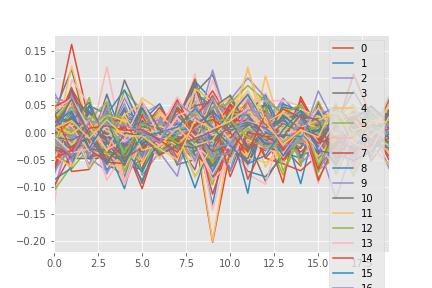

In [18]:
%matplotlib notebook
X_train_df.plot()

In [20]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
#print(scaler.fit(data))
StandardScaler()

st_data=scaler.fit_transform(data)

In [21]:
st_data

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [22]:
X_train_st=scaler.fit_transform(X_train)

In [27]:
y_train=y_train.reshape(-1,1)
#The data used to scale along the features axis.
y_train_st=scaler.fit_transform(y_train)

In [45]:
y_train_st

array([[-1.59803395],
       [-0.01716412],
       [ 0.02282546],
       [ 0.07137725],
       [ 2.56101563],
       [ 0.54878123],
       [ 0.14288432],
       [ 0.69595891],
       [-0.20936556],
       [ 1.25426649],
       [-1.13020123],
       [ 0.3198415 ],
       [-1.01603674],
       [ 0.55929674],
       [ 0.58838758],
       [-0.65512362],
       [-1.96147969],
       [ 0.67466051],
       [-0.0431856 ],
       [-0.80870512]])

In [51]:
y_train_arr_st=np.asarray(y_train_st)
y_train_arr_st

array([[-1.59803395],
       [-0.01716412],
       [ 0.02282546],
       [ 0.07137725],
       [ 2.56101563],
       [ 0.54878123],
       [ 0.14288432],
       [ 0.69595891],
       [-0.20936556],
       [ 1.25426649],
       [-1.13020123],
       [ 0.3198415 ],
       [-1.01603674],
       [ 0.55929674],
       [ 0.58838758],
       [-0.65512362],
       [-1.96147969],
       [ 0.67466051],
       [-0.0431856 ],
       [-0.80870512]])

In [48]:
y_train_st_reshape=y_train_st.reshape(1,-1)

In [49]:
y_train_st_reshape

array([[-1.59803395, -0.01716412,  0.02282546,  0.07137725,  2.56101563,
         0.54878123,  0.14288432,  0.69595891, -0.20936556,  1.25426649,
        -1.13020123,  0.3198415 , -1.01603674,  0.55929674,  0.58838758,
        -0.65512362, -1.96147969,  0.67466051, -0.0431856 , -0.80870512]])

In [50]:
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_train_st_reshaped.npy", y_train_st_reshape)

In [28]:
X_test_st=scaler.fit_transform(X_test)

In [29]:
y_test=y_test.reshape(-1,1)
y_test_st=scaler.fit_transform(y_test)

In [30]:
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_test_st.npy", y_test_st)
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_train_st.npy", y_train_st)
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_train_st.npy", X_train_st)
np.save("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_test_st.npy", X_test_st)

In [40]:
X_train_st[:][0]

array([ 2.81632774e-01, -9.20164849e-01, -1.03373460e+00,  4.69828914e-01,
       -8.45795959e-02, -2.31151635e-01, -2.53959933e+00,  5.82760125e-01,
       -8.02156743e-01,  1.23557714e+00, -9.78967218e-02, -2.09584078e-02,
       -1.09645698e+00, -7.78188680e-01,  3.65399792e-01,  1.09711506e+00,
       -1.12080506e+00, -1.23394182e+00, -2.18704253e-02,  9.82719355e-01,
       -6.90536945e-02,  2.42371532e-01, -4.39176821e-01,  1.09862090e+00,
        1.76350148e+00,  5.80113702e-01, -2.39568274e-02, -6.61275677e-01,
       -6.70412623e-01, -2.71504215e-01,  3.91205263e-01,  1.00386612e-01,
       -1.72357605e+00,  1.97276352e+00,  1.67333991e+00, -5.46263840e-01,
        9.30625600e-01,  5.26663461e-01, -1.84813034e+00,  1.57223560e-01,
       -5.15427174e-01, -1.30926145e+00, -2.67968472e+00,  3.21417814e-01,
        7.40900889e-01, -2.44747250e+00, -1.40745864e+00, -1.04205960e+00,
       -5.85744260e-01, -8.63838018e-01, -8.84245816e-01,  3.76798146e-01,
        1.37861384e+00,  

<IPython.core.display.Javascript object>


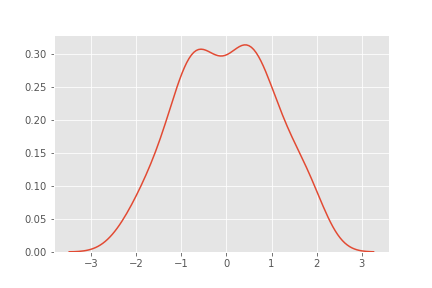

In [43]:
sns.kdeplot(X_test_st[:][2])

In [24]:
X_train_st.mean()

7.894919286223335e-18

In [32]:
X_test_st.std()

1.0

Standardize data? Automatically?

The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:

what do I want to know - are any features predictive for MRS results - if yes what is the function to predict - to avoid overfitting look at test error!

In [ ]:
!pip install glmnet

Elastic Net - CV for alpha

Computing regularization path using the coordinate descent elastic net...


<IPython.core.display.Javascript object>


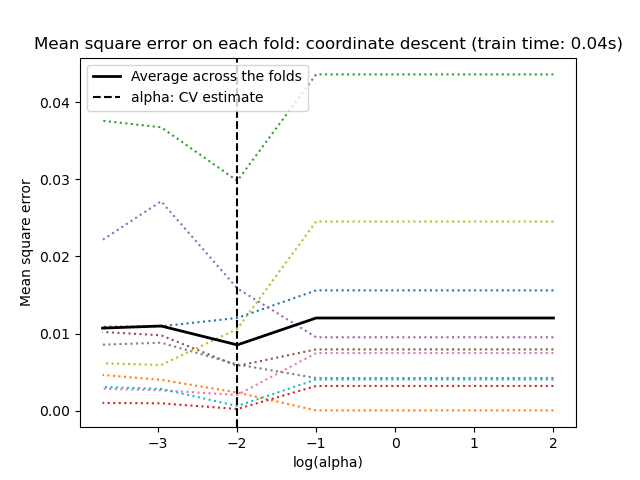

Text(0.5, 1.0, 'Mean square error on each fold: coordinate descent (train time: 0.04s)')

In [63]:
%matplotlib notebook
# LassoCV: coordinate descent
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4
# Compute paths
print("Computing regularization path using the coordinate descent elastic net...")
t1 = time.time()
# alphas in log space, get a training (21p) and test (6p) sets!
#you need
model = ElasticNetCV(cv=10, alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],random_state=0, normalize=True, l1_ratio=0.5).fit(X_train, y_train)
t_elastic_cv = time.time() - t1

# Display results
m_log_alphas = np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_elastic_cv)

In [65]:
model.alpha_

0.01

In [67]:
model.path(X_train, y_train, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, check_input=True)           

(array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
 array([[-0.        , -0.        , -0.        , ..., -0.        ,
         -0.0278494 , -0.00678973],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.01449161, -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.0932985 , -0.28632984],
        ...,
        [-0.        , -0.        , -0.        , ..., -0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ]]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.70034870e-06, 2.22636561e-05]))

In [68]:
mod = sm.OLS(y_train, X_train) 

In [69]:
res = mod.fit()

In [70]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 May 2020   Prob (F-statistic):                nan
Time:                        11:34:20   Log-Likelihood:                 701.00
No. Observations:                  20   AIC:                            -1362.
Df Residuals:                       0   BIC:                            -1342.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0783        inf         -0        n

C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\statsmo

In [71]:
e_res=mod.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.5, start_params=None, profile_scale=False, refit=False)

In [74]:
e_res

# Trying out glmnet

In [2]:
import sys
sys.path.append('../test')
sys.path.append('../lib')
import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

In [4]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
# Import relevant modules and setup for calling glmnet
%reset -f
%matplotlib inline

# parameters
baseDataDir= '../data/'

# load data
x = scipy.loadtxt(baseDataDir + 'QuickStartExampleX.dat', dtype = scipy.float64)
y = scipy.loadtxt(baseDataDir + 'QuickStartExampleY.dat', dtype = scipy.float64)

# create weights
t = scipy.ones((50, 1), dtype = scipy.float64)
wts = scipy.row_stack((t, 2*t))

In [18]:
fit = glmnet(x = X_train.copy(), y = y_train.copy(), family = 'gaussian', alpha = 0.5, nlambda = 20)

ValueError: loadGlmlib does not currently work for windows